# Application Development Summative ML model for Wind generation

<div class="alert alert-block alert-info">
</b> Submitted by Hemal D. Patel</div>

### Objective

To Create a simple ML model application which accepts suitable inputs and gives a predicted power output for each power generation plant for any day within the next 7 days.

One for each genaration plant shall be created. 

The ML models shall be of Multiple Linear Regresssion.

### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import os

%matplotlib inline

In [2]:
# confirm the path from which the data files shall be loaded;
os.getcwd()

'D:\\AIIP\\Application Development\\Summative'

Load the monthly maintainance schedule and Annual Generation data files for both generation plants

In [3]:
# Wind Monthly Maintenance schedule;
# Wind_monthly_schedule=pd.read_csv('wind_farm.csv') # load data description csv file on to a pandas data frame.

wind_monthly_schedule=pd.read_csv('wind_farm.csv', skiprows=1) # load csv file on to a pandas data frame. One Errenous row is
# skipped
wind_monthly_schedule

,Date Of Month,Capacity Available
0,4,3
1,6,5
2,19,2
3,23,50
4,24,20
5,25,5
6,28,10


In [4]:
# Wind annual generation data;
wind_annual_gen=pd.read_csv('wind_generation_data.csv') # load csv file on to a pandas data frame
wind_annual_gen

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22
...,...,...,...
361,10.59,233,40.49
362,10.36,233,34.65
363,10.12,234,39.53
364,9.87,234,32.29


### Explore the data

In [5]:
wind_annual_gen.describe() # summary statistics for all features or attributes
# data.describe() # summary statistics for features or attributes

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


In [6]:
wind_annual_gen.info() # View of data types and count of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wind speed    366 non-null    float64
 1   direction     366 non-null    int64  
 2   Power Output  366 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [7]:
#  Check for missing val
wind_annual_gen.isna().sum()

wind speed      0
direction       0
Power Output    0
dtype: int64

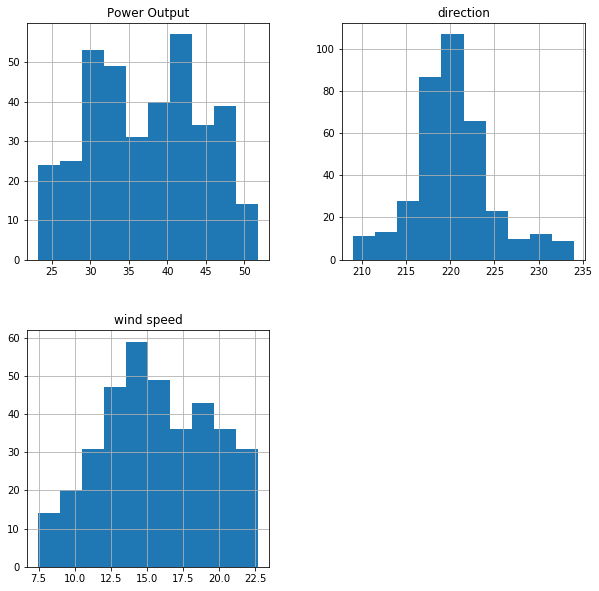

In [8]:
# Visualization of the features using Histogram
pd.DataFrame.hist(wind_annual_gen, figsize=(10,10)); # Histogram plots help to visualize the distribution characteristics. 

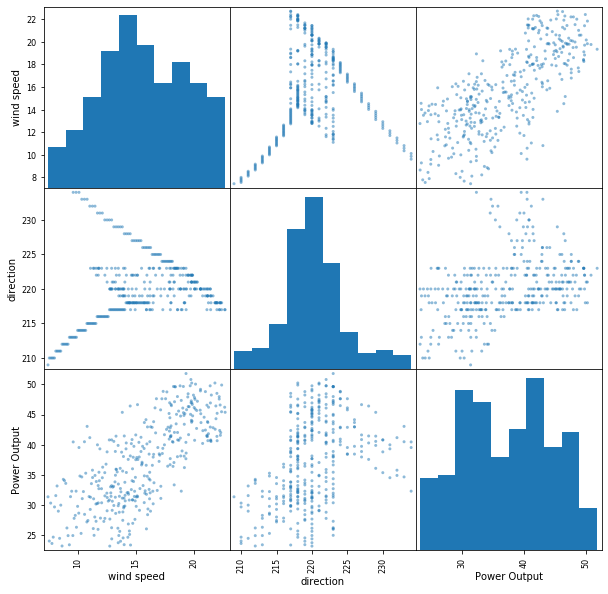

In [9]:
# Visualize the relationships between features

scatter_matrix(wind_annual_gen, figsize=(10,10));

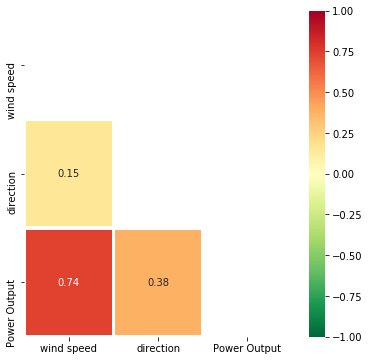

In [10]:
# Heatmap plot for viewing strength of corelations
plt.figure(figsize=(6,6))
corr_df = wind_annual_gen.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr_df, cmap='RdYlGn_r',annot = True);

sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5, annot = True);

# At a glance it is possible to see there is strong positive (dark red color) corelation between Power Output and wind speed
# variables


### Split dataset into predictor and target matrices & Create model and save using pickling

In [11]:
# Split dataset into predictor and target matrices
from sklearn import model_selection

# Values of target
y = wind_annual_gen['Power Output'].values

# Values of attributes
wind_annual_gen_X = wind_annual_gen.drop(['Power Output'], axis=1) # Drop the target value
X = wind_annual_gen_X.values
print('Target Values y=',y[:10]) # View first 10 Target values
print('\nAttribute Values X=',X[:3]) # view of 3no. rows of Attribute Values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)# Use test size of 25% for better
# performance

Target Values y= [34.76 36.59 32.35 39.37 33.22 37.09 41.23 32.72 40.39 37.54]

Attribute Values X= [[ 16.   218.  ]
 [ 15.91 218.  ]
 [ 15.82 218.  ]]


In [12]:
# # Fit the model on training set
# windmodel = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
# windmodel.fit(X_train, y_train)

In [13]:
# # Save Model Using Pickle

# import pickle

# fileObj = open('wind_model.obj', 'wb')
# pickle.dump(windmodel,fileObj)
# fileObj.close()

In [14]:
# use pickling to load the solar model from the object file
import pickle   

fileObj = open('wind_model.obj', 'rb')
windmodel = pickle.load(fileObj)
fileObj.close()
windmodel

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [15]:
# Predict
y_pred = windmodel.predict(X_test)
y_pred

array([29.3557    , 47.78866342, 30.951316  , 32.323301  , 30.098193  ,
       40.441345  , 28.249518  , 45.746614  , 47.667999  , 37.690151  ,
       26.20879   , 29.144528  , 48.437981  , 47.78866342, 43.65635067,
       39.33798   , 45.28787233, 26.23416   , 42.44879   , 27.0214    ,
       32.891964  , 35.449373  , 32.331566  , 48.237768  , 45.435684  ,
       44.038726  , 29.01966   , 42.583698  , 27.575558  , 38.353093  ,
       30.826772  , 30.462072  , 33.37507   , 32.111456  , 31.495868  ,
       36.287951  , 32.813429  , 32.950212  , 48.444852  , 27.888747  ,
       40.344279  , 46.67844283, 38.44804   , 48.285589  , 30.73285   ,
       45.392238  , 40.641895  , 45.49678406, 42.30464154, 27.317313  ,
       33.622894  , 41.639434  , 41.92174575, 35.213087  , 27.582585  ,
       31.417346  , 32.729489  , 31.671218  , 27.894942  , 31.992401  ,
       44.213046  , 44.38234225, 39.136126  , 32.136319  , 42.352901  ,
       40.587519  , 29.842862  , 29.045315  , 45.726617  , 32.04

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [16]:
# Score
print('\nModel train set Score=',windmodel.score(X_train, y_train))
print('\nModel test set Score=',windmodel.score(X_test, y_test))

# The model performance is good and has generalized well with the unseen test data set. There is a slight difference between
# the test and training data set scores and have generally performed well. There is some overfitting. 


Model train set Score= 0.95723631396018

Model test set Score= 0.739305036261068


In [17]:
# R2 Score
r2_score(y_test, y_pred)

# Model accuracy is good. The R2 score of 81% means the regression model fits the observations well.  

0.739305036261068

In [18]:
# Model Predictions
print('y_test[35]=',y_test[35],'y_pred[20]=',y_pred[20])
# print('\ny_test[400],y_pred=',y_test[400],'y_pred[400]=',y_pred[400])
# print('\ny_test[800],y_pred=',y_test[800],'y_pred[800]=',y_pred[800])

y_test[35]= 37.09 y_pred[20]= 32.891963999998104


In [19]:
# Comparing the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)
df.describe()

# Summary statistics also displays similarities in the mean, standard deviation,median, interquartile range and etc. 
# for the Power Generated in MW for the Actual and Predicted  

    Actual  Predicted
0    29.03  29.355700
1    45.38  47.788663
2    33.22  30.951316
3    31.44  32.323301
4    24.46  30.098193
..     ...        ...
87   43.82  37.146307
88   49.77  44.996364
89   46.22  43.393315
90   43.92  46.124723
91   29.74  34.772190

[92 rows x 2 columns]


,Actual,Predicted
count,92.000000,92.000000
mean,37.230109,37.487011
std,7.845594,6.835037
min,23.190000,26.208790
25%,30.975000,31.912105
50%,37.980000,37.302485
75%,44.190000,43.855799
max,50.240000,48.444852


### **<font color=blue>Conclusion<br><font color=blue>The model performance and accuracy are good at 73.9% and therefore the model is able to predict the Wind generated power(MW)  with about 73.9% accuracy . Also looking at the summary statistics for the actual and Predicted, the model has performed very well. </font>**

In [20]:
# Prediction of Wind generation using unseen data from the Weather API in JSON format

# The machine-readable API will produce a set of data that can be used directly by application.
# JSON: http://www.7timer.info/bin/api.pl?lon=53.557&lat=8.598&product=civil&output=json

import urllib, json

url = "http://www.7timer.info/bin/api.pl?lon=53.557&lat=8.598&product=civil&output=json"

import requests

r = requests.get(url)

print (r.json())

{'product': 'civil', 'init': '2020092300', 'dataseries': [{'timepoint': 3, 'cloudcover': 9, 'lifted_index': -1, 'prec_type': 'none', 'prec_amount': 0, 'temp2m': 26, 'rh2m': '88%', 'wind10m': {'direction': 'SW', 'speed': 5}, 'weather': 'cloudyday'}, {'timepoint': 6, 'cloudcover': 9, 'lifted_index': -1, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 26, 'rh2m': '84%', 'wind10m': {'direction': 'SW', 'speed': 5}, 'weather': 'cloudyday'}, {'timepoint': 9, 'cloudcover': 9, 'lifted_index': -1, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 26, 'rh2m': '89%', 'wind10m': {'direction': 'SW', 'speed': 5}, 'weather': 'cloudyday'}, {'timepoint': 12, 'cloudcover': 9, 'lifted_index': -1, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 26, 'rh2m': '84%', 'wind10m': {'direction': 'SW', 'speed': 5}, 'weather': 'cloudyday'}, {'timepoint': 15, 'cloudcover': 3, 'lifted_index': -1, 'prec_type': 'none', 'prec_amount': 1, 'temp2m': 26, 'rh2m': '80%', 'wind10m': {'direction': 'SW', 'speed': 5}, 'weather':

In [21]:
import pandas as pd
pd.read_json (r.url)

,product,init,dataseries
0,civil,2020092300,"{'timepoint': 3, 'cloudcover': 9, 'lifted_inde..."
1,civil,2020092300,"{'timepoint': 6, 'cloudcover': 9, 'lifted_inde..."
2,civil,2020092300,"{'timepoint': 9, 'cloudcover': 9, 'lifted_inde..."
3,civil,2020092300,"{'timepoint': 12, 'cloudcover': 9, 'lifted_ind..."
4,civil,2020092300,"{'timepoint': 15, 'cloudcover': 3, 'lifted_ind..."
...,...,...,...
59,civil,2020092300,"{'timepoint': 180, 'cloudcover': 4, 'lifted_in..."
60,civil,2020092300,"{'timepoint': 183, 'cloudcover': 4, 'lifted_in..."
61,civil,2020092300,"{'timepoint': 186, 'cloudcover': 2, 'lifted_in..."
62,civil,2020092300,"{'timepoint': 189, 'cloudcover': 1, 'lifted_in..."
